In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


### Getting Data

In [6]:
clinical_data = CPTAC.get_clinical()

print(clinical_data)

fsb = clinical_data[['FIGO_stage', 'BMI']]

print(fsb)

     Proteomics_Participant_ID  Proteomics_TMT_batch  Proteomics_TMT_plex  \
idx                                                                         
S001                 C3L-00006                     2                    5   
S002                 C3L-00008                     4                   16   
S003                 C3L-00032                     1                    2   
S004                 C3L-00084                     3                   11   
S005                 C3L-00090                     3                   12   
S006                 C3L-00098                     4                   14   
S007                 C3L-00136                     4                   16   
S008                 C3L-00137                     4                   15   
S009                 C3L-00139                     3                   11   
S010                 C3L-00143                     4                   14   
S011                 C3L-00145                     3                    9   

In [7]:
CPTAC.define('FIGO_stage')
CPTAC.define('BMI')

Categorical classification of FIGO state (I being less severe, IV being more severe)
BMI (body mass index) of specified patient.


### Organize Data

In [8]:

pd.set_option('mode.chained_assignment', None)
fsb.loc[fsb.FIGO_stage == 'IA', 'FIGO_stage'] = 'I'
fsb.loc[fsb.FIGO_stage == 'IB', 'FIGO_stage'] = 'I'
fsb.loc[fsb.FIGO_stage == 'IIIA', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIB', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIC1', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IIIC2', 'FIGO_stage'] = 'III'
fsb.loc[fsb.FIGO_stage == 'IVB', 'FIGO_stage'] = 'IV'
figo_stage_bmi = fsb.sort_values('FIGO_stage')

### Plot with Histogram

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


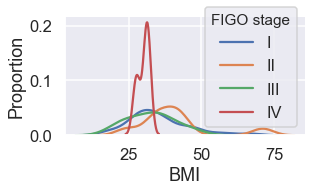

In [9]:
sns.set(style='darkgrid', context="talk")
NUM_COLORS = 12

figoHist = sns.FacetGrid(figo_stage_bmi, hue="FIGO_stage", legend_out=False, aspect=1.5)
figoHist = figoHist.map(sns.kdeplot, "BMI").add_legend(title="FIGO stage")
figoHist.set(ylabel='Proportion')
plt.show()

### Plot with boxplot

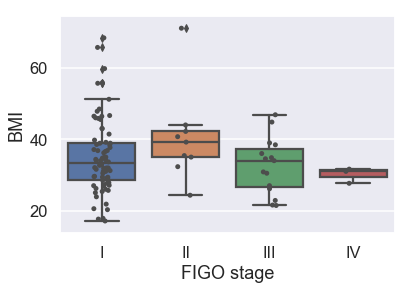

In [10]:
figoStrip = sns.boxplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI")
figoStrip = sns.stripplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
plt.show()

### Plot data on diabetes with boxplot

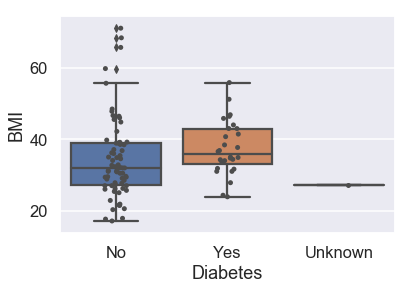

In [11]:
diabetes_bmi = clinical_data[['Diabetes', 'BMI']]
figoStrip = sns.boxplot(data=diabetes_bmi, x="Diabetes", y="BMI")
figoStrip = sns.stripplot(data=diabetes_bmi, x="Diabetes", y="BMI", jitter=True, color=".3")
plt.show()